# Sentimental Analysis Model

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import joblib
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_csv('AmazonReview.csv')
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


### Preprocessing and Cleaning the Reviews

In [3]:
df.shape

(14999, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     14998 non-null  object
 1   Sentiment  14999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.Sentiment.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [7]:
df['Review']=df['Review'].str.lower()

In [8]:
stp_words=['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
stp_words.remove('not')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
df['Review']=df['Review'].apply(clean_review)

In [9]:
#1,2,3->negative(i.e 0)
df.loc[df['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
df.loc[df['Sentiment']>3,'Sentiment'] = 1

df.Sentiment.unique()

array([0, 1], dtype=int64)

In [10]:
df.head()

,Review,Sentiment
0,fast shipping product cheaply made brought gra...,0
1,case takes long ship it's not even worth dont ...,0
2,good not droids. not good iphones. cannot use ...,0
3,cable not compatible macbook iphone. also conn...,0
4,case nice not glow light. i'm disappointed pro...,0


In [11]:
classes = df.Sentiment.unique()
print(classes)

[0 1]


In [12]:
reviewText=[]
for i in df['Review']:
    reviewText.append(i)

### Visualizing the data

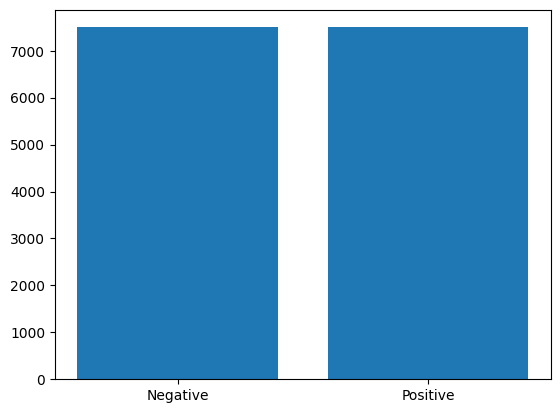

In [13]:
counts = []
for i in classes:
  count = len(df[df.Sentiment == i])
  counts.append(count)
plt.bar(['Negative','Positive'],counts)
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

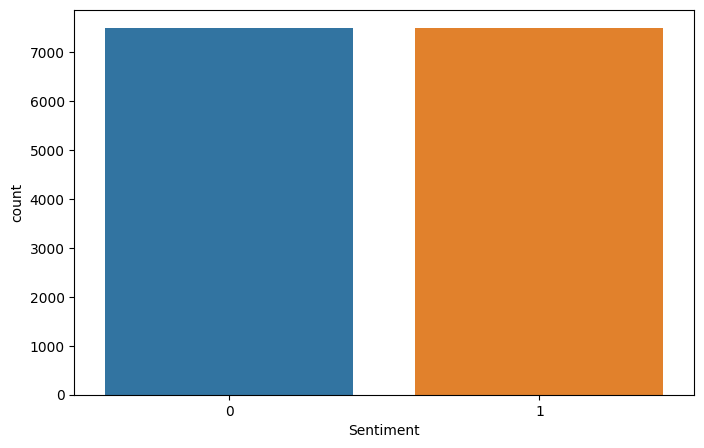

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Sentiment)

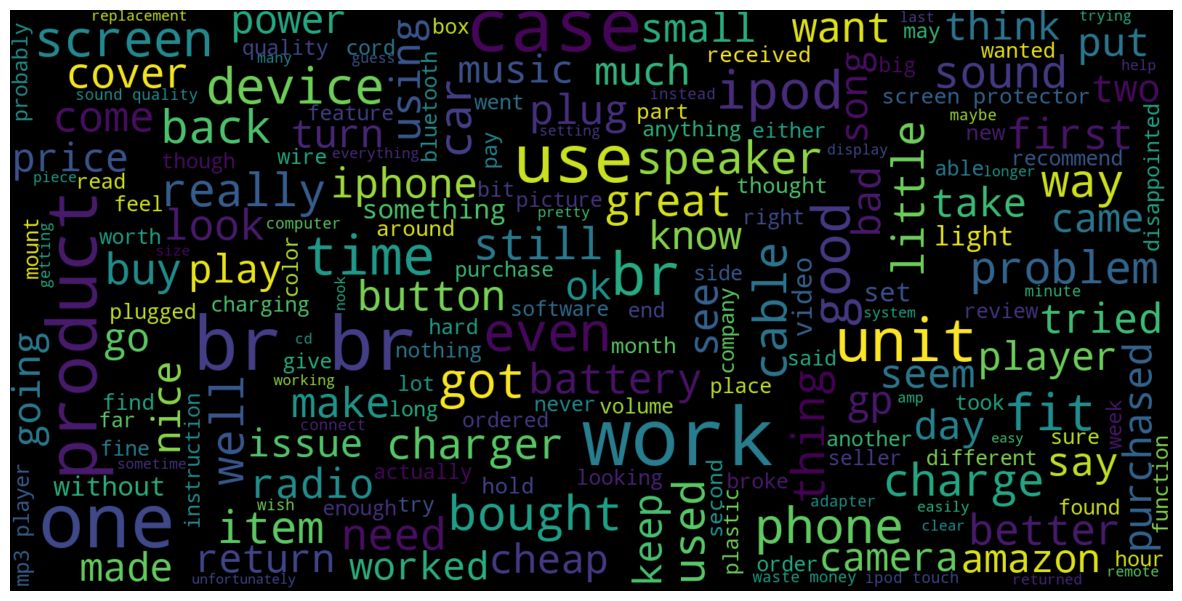

In [15]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

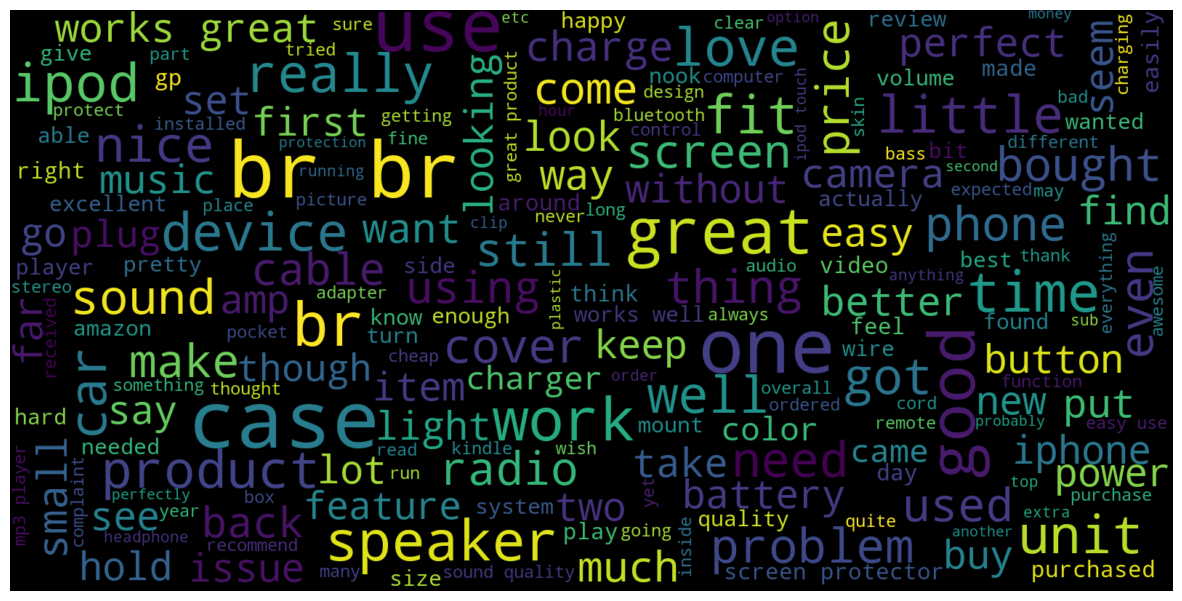

In [16]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

### Converting Text into Vectors

In [17]:
cv = TfidfVectorizer(max_features = 1420)
X = cv.fit_transform(reviewText).toarray()
y = df.iloc[:, -1].values

### Model training, Evaluation, and Prediction

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

In [19]:
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
score=classifier.score(X_test,y_test)
print('Accuracy: ',score)

Accuracy:  0.8133333333333334


### Dumping the Model

In [22]:
pickle.dump(cv, open('model_final.pkl', "wb"))
joblib.dump(classifier,'Classifier__Model') 

['Classifier__Model']